In [1]:
#!pip install parse

In [2]:
import glob
import os
import parse

In [3]:
log_folder = "/media/data/dad/cnet/experiments/test_step2/image_log/train/"
log_names = [os.path.basename(path) for path in glob.glob(os.path.join(log_folder, "*"))]
print(len(log_names))

1196


In [4]:
log_format = "{}_gs-{:06}_e-{:06}_b-{:06}.png"
logs = []
for log_name in log_names:
    logs.append(list(parse.parse(log_format, log_name)) + [log_name])

In [5]:
log_types = list({log[0] for log in logs})
log_types = ['control', 'reconstruction', 'samples_cfg_scale_9.00']

In [6]:
log_iters = sorted(list({log[1] for log in logs}))
log_iters

['000050',
 '000100',
 '000146',
 '000196',
 '000246',
 '000292',
 '000342',
 '000392',
 '000438',
 '000488',
 '000538',
 '000584',
 '000634',
 '000684',
 '000730',
 '000780',
 '000830',
 '000876',
 '000926',
 '000976',
 '001022',
 '001072',
 '001122',
 '001168',
 '001218',
 '001268',
 '001314',
 '001364',
 '001414',
 '001460',
 '001510',
 '001560',
 '001606',
 '001656',
 '001706',
 '001752',
 '001802',
 '001852',
 '001898',
 '001948',
 '001998',
 '002044',
 '002094',
 '002144',
 '002190',
 '002240',
 '002290',
 '002336',
 '002386',
 '002436',
 '002482',
 '002532',
 '002582',
 '002628',
 '002678',
 '002728',
 '002774',
 '002824',
 '002874',
 '002920',
 '002970',
 '003020',
 '003066',
 '003116',
 '003166',
 '003212',
 '003262',
 '003312',
 '003358',
 '003408',
 '003458',
 '003504',
 '003554',
 '003604',
 '003650',
 '003700',
 '003750',
 '003796',
 '003846',
 '003896',
 '003942',
 '003992',
 '004042',
 '004088',
 '004138',
 '004188',
 '004234',
 '004284',
 '004334',
 '004380',
 '004430',

In [7]:
log_epochs = sorted(list({log[2] for log in logs}))
log_epochs

['000000',
 '000001',
 '000002',
 '000003',
 '000004',
 '000005',
 '000006',
 '000007',
 '000008',
 '000009',
 '000010',
 '000011',
 '000012',
 '000013',
 '000014',
 '000015',
 '000016',
 '000017',
 '000018',
 '000019',
 '000020',
 '000021',
 '000022',
 '000023',
 '000024',
 '000025',
 '000026',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000034',
 '000035',
 '000036',
 '000037',
 '000038',
 '000039',
 '000040',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049',
 '000050',
 '000051',
 '000052',
 '000053',
 '000054',
 '000055',
 '000056',
 '000057',
 '000058',
 '000059',
 '000060',
 '000061',
 '000062',
 '000063',
 '000064',
 '000065',
 '000066',
 '000067',
 '000068',
 '000069',
 '000070',
 '000071',
 '000072',
 '000073',
 '000074',
 '000075',
 '000076',
 '000077',
 '000078',
 '000079',
 '000080',
 '000081',
 '000082',
 '000083',
 '000084',
 '000085',
 '000086',
 '000087',
 '000088',
 '000089',
 '000090',

In [8]:
log_batchs = sorted(list({log[3] for log in logs}))
log_batchs

['000000', '000200', '000400']

In [9]:
log_dict = {tuple(log[:2]):log[-1] for log in logs}  # key: (log_type, log_iter)

In [13]:
#iters_to_display = log_iters[:2]
iters_to_display = log_iters[::8]
print(iters_to_display)
types_to_display = log_types
image_names_to_display = [log_dict[(log_type, log_iter)] for log_iter in iters_to_display for log_type in types_to_display]
image_files_to_display = [os.path.join(log_folder, name) for name in image_names_to_display]

['000050', '000438', '000830', '001218', '001606', '001998', '002386', '002774', '003166', '003554', '003942', '004334', '004722', '005110', '005502', '005890', '006278', '006670', '007058', '007446', '007838', '008226', '008614', '009006', '009394', '009782', '010174', '010562', '010950', '011342', '011730', '012118', '012510', '012898', '013286', '013678', '014066', '014454']


In [14]:
import matplotlib.pyplot as plt
import numpy as np
def plot_figures(images, nrows = 1, ncols=4):

    fig = plt.figure()
    
    image_heigt = 256 # Height of the image
    image_width = 256 # Width of the image

    pixels = np.zeros((nrows*image_heigt,ncols*image_width, 3), dtype=np.uint8) # Create
    curr = 0
    for a in range(nrows):
        for b in range(ncols):
            resized = cv2.resize(images[curr], (image_width, image_heigt)).astype(np.uint8)
            pixels[a*image_heigt:a*image_heigt+image_heigt,b*image_heigt:b*image_heigt+image_heigt] = resized
            curr += 1
    plt.imshow(pixels[:,:,::-1], cmap='gray')
    plt.axis('off')
    plt.show()
    cv2.imwrite("visualize_imglog.png", pixels)

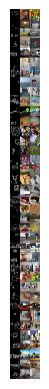

In [15]:
import cv2

images = [cv2.imread(f) for i, f in enumerate(image_files_to_display)]

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(images, len(iters_to_display), len(log_types))